#Independent Project Investigating Satellite Images of Puerto Rico Through Sentinel Python API
## Inigo Peng  Student Number: 09388389

For the first part of this independent project, I looked into the ways that I could best access Sentinel 2 Images from the past, and in the present. Sentinel 2 sensors are built onto twin satellites flying in the same orbit. There is a temporal resolution of 5 days, a swath width of 290km, and a flight height of 786km altitude. The first satellite was launched on June 23, 2015 and the second satellite was launched on March 7, 2017. There are 12 spectral bands that could be found on Sentinel-2 sensors. They include coastal aerosol band (60m spatial resolution), RGB(10m), 3 vegetation red edge band (20m), 2 NIR band (band 8 is 10m and band 8A is 20m), water vapour band(60m), SWIR cirrus band (60m) and 2 SWIR bands (20m). For this project, I was interested in the RGB bands and NIR band 8.   All of the Sentinel 2 images are 100km^2 x 100km^2. There are two levels of images that could be accessed: Level-1C which are images that have been geometrically and radiometrically corrected, and Level-2A, which are orthoimage bottom of atmosphere corrected reflectance product. Level 2A images will be used to perform NDVI calculations. However, they were not as widely available as an operational product until mid-March 2018. Global coverage did not start until December 2018.

For this project, I will be gathering available images for both Level-2A and Level-1C images. For Level-1C images, I will be performing my own atmospheric correction to generate Level-2A products. As I started this project, I quickly found out that there are a numerous ways that one could access Sentinel images. My initial method of access was go to the Copernicus Open Access Hub, and sort through the satellite images from the GUI. However, I quickly found out that this was a very slow and cumbersome process if I need large number of images. Due to the size of these images, it often takes a long time to load the meta-information and the preview of each image. It became very inefficient. Furthermore, it was easy to lose the query for the products. I also found out that for Level 1-C products older than 12 months, they are put into Long Term Archives (LTA). According to the ESA website, "access to product URL for data that are no longer available online will automatically trigger the retrieval from LTA". They would be "restored within 24 hours and kep online for 3 days". However, this was not the case for me as the images I requested remained offline after 24 hours. This was when I decided to change my method and resorted to using the Sentinelsat API. 

Sentinelsat API made it easy to access and retrive data from Copernicus Open Hub. I found that it made query images very fast and efficient. I conducted my query based on cloudcoverage, and the tile ID (19QGA) of the images of the study area. Although I was able to find the images that I wanted to download, I still had trouble with downloads from the long term archives. After doing some more research, I found Plateforme d'Exploitation des Produits Sentinel (PEPS), which is the French 'mirror site' managed by the European Commission that redistributes the products of Sentinel satellites. While products in long term archive still takes about 24 hour to 48 hours to prepare, the GUI at PEPS is significantly faster than Copernicus Open Hub (maybe due to less traffic?). Using sentinelsat API to filter the images I need, I was able to download a handful of relatively cloudfree images from PEPS. Below is code that I used to query the images from sentinelsat API. 


In [1]:
import geojson
import folium
import numpy as np
import geopandas as gpd
from sentinelsat.sentinel import SentinelAPI, read_geojson, geojson_to_wkt
import matplotlib.pyplot as plt

In [2]:
#Set query boundary.
m = folium.Map(location = [18.33952, -66.780384], zoom_start = 9)
boundsdata = r'C:\python_workfolder\pr_newbound.json'
folium.GeoJson(boundsdata).add_to(m)
m

In [3]:
#Connect to api.
user = 
password = 
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/dhus')

In [4]:
#Search by polygon.
footprint = geojson_to_wkt(read_geojson(boundsdata))

In [5]:
#Search for 2015 products.
twentyfifteen_products = api.query(footprint,
                     date = ('20150101', '20151231'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-1c',
                     cloudcoverpercentage = (0, 30))

#Access metadata of the image using TileID and Cloudcover Percentage. I also included the sensing dates of the image.
for item in twentyfifteen_products:
    if twentyfifteen_products[item]['tileid'] == '19QGA':
        print(twentyfifteen_products[item]['tileid'])
        print(item)
        print(twentyfifteen_products[item]['title'])
        print(twentyfifteen_products[item]['summary'])
        print(twentyfifteen_products[item]['cloudcoverpercentage'])

19QGA
85a8e6e1-75f0-4f4d-87a1-39724ab06307
S2A_MSIL1C_20150916T150746_N0204_R082_T19QGA_20150916T150746
Date: 2015-09-16T15:07:46.028Z, Instrument: MSI, Mode: , Satellite: Sentinel-2, Size: 443.66 MB
26.5611
19QGA
72fdedb0-c0e7-4131-b9ce-bda845cff11f
S2A_MSIL1C_20151006T150746_N0204_R082_T19QGA_20151006T150746
Date: 2015-10-06T15:07:46.027Z, Instrument: MSI, Mode: , Satellite: Sentinel-2, Size: 439.89 MB
16.723
19QGA
363e871c-6702-4441-ac79-faa330b2c715
S2A_MSIL1C_20151225T150742_N0201_R082_T19QGA_20151225T150744
Date: 2015-12-25T15:07:42.029Z, Instrument: MSI, Mode: , Satellite: Sentinel-2, Size: 433.87 MB
4.0


In [6]:
#Search for 2016 products.
twentysixteen_products = api.query(footprint,
                     date = ('20160101', '20161231'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-1c',
                     cloudcoverpercentage = (0, 10))
#For some reason, there is a key error at the end of the query despite properly displaying the query.
for item in twentysixteen_products:
    if twentysixteen_products[item]['tileid'] == '19QGA':
        print(twentysixteen_products[item]['tileid'])
        print(item)
        print(twentysixteen_products[item]['title'])
        print(twentysixteen_products[item]['summary'])
        print(twentysixteen_products[item]['cloudcoverpercentage'])

19QGA
2e957af6-b3d0-411f-923c-da9ce48727c3
S2A_MSIL1C_20160104T150742_N0201_R082_T19QGA_20160104T150743
Date: 2016-01-04T15:07:42.029Z, Instrument: MSI, Mode: , Satellite: Sentinel-2, Size: 442.31 MB
4.0
19QGA
7497447e-7e03-4985-b96b-415f951f2eec
S2A_MSIL1C_20160503T150722_N0202_R082_T19QGA_20160503T150724
Date: 2016-05-03T15:07:22.027Z, Instrument: MSI, Mode: , Satellite: Sentinel-2, Size: 791.42 MB
9.4352
19QGA
6591472a-42e8-4301-8a1e-211aec2fbcfc
S2A_MSIL1C_20160612T150722_N0202_R082_T19QGA_20160612T150723
Date: 2016-06-12T15:07:22.027Z, Instrument: MSI, Mode: , Satellite: Sentinel-2, Size: 802.40 MB
4.9463
19QGA
bcd8f556-8a1a-46a5-9462-e6d994b1b764
S2A_MSIL1C_20160722T150722_N0204_R082_T19QGA_20160722T150724
Date: 2016-07-22T15:07:22.026Z, Instrument: MSI, Mode: , Satellite: Sentinel-2, Size: 779.84 MB
6.7159
19QGA
3c8a98f3-8c23-4fbe-b380-4f13b9d09520
S2A_MSIL1C_20160811T150722_N0204_R082_T19QGA_20160811T150723
Date: 2016-08-11T15:07:22.026Z, Instrument: MSI, Mode: , Satellite: Sen

KeyError: 'tileid'

In [7]:
#Search for 2017 products.
twentyseventeen_products = api.query(footprint,
                     date = ('20170101', '20171231'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-1c',
                     cloudcoverpercentage = (0, 20))
# print(len(twentyfifteen_products))
cloud_coverage_2017_list = []
for item in twentyseventeen_products:
    if twentyseventeen_products[item]['tileid'] =='19QGA':
        print(twentyseventeen_products[item]['tileid'])
        print(item)
        cloud_coverage_2017_list.append(item)
        print(twentyseventeen_products[item]['title'])
        print(twentyseventeen_products[item]['summary'])
        print(twentyseventeen_products[item]['cloudcoverpercentage'])

19QGA
649055bd-0342-47bc-9ca2-df666cb78807
S2B_MSIL1C_20171229T150709_N0206_R082_T19QGA_20171229T194733
Date: 2017-12-29T15:07:09.027Z, Instrument: MSI, Mode: , Satellite: Sentinel-2, Size: 706.05 MB
19.8432
19QGA
43e0ab74-e067-4d0f-8fd3-5ce7cef00111
S2A_MSIL1C_20171224T150711_N0206_R082_T19QGA_20171224T164928
Date: 2017-12-24T15:07:11.026Z, Instrument: MSI, Mode: , Satellite: Sentinel-2, Size: 751.28 MB
12.9425
19QGA
91b7b6dd-f57c-4749-a4c6-47979e72043e
S2A_MSIL1C_20171214T150741_N0206_R082_T19QGA_20171214T163203
Date: 2017-12-14T15:07:41.026Z, Instrument: MSI, Mode: , Satellite: Sentinel-2, Size: 428.62 MB
5.5312
19QGA
2c6a75a4-7327-45b0-b493-ea9a40982b13
S2B_MSIL1C_20171209T150709_N0206_R082_T19QGA_20171209T195400
Date: 2017-12-09T15:07:09.027Z, Instrument: MSI, Mode: , Satellite: Sentinel-2, Size: 752.29 MB
0.7842
19QGA
daa5178c-b1f6-4b7a-9df2-420ed2706002
S2A_MSIL1C_20171204T150711_N0206_R082_T19QGA_20171204T164858
Date: 2017-12-04T15:07:11.026Z, Instrument: MSI, Mode: , Satellite

KeyError: 'tileid'

In [8]:
#This is an example of the API failing to retrieve products in Long Term Archive.
api.download('2c6a75a4-7327-45b0-b493-ea9a40982b13')

Product 2c6a75a4-7327-45b0-b493-ea9a40982b13 is not online. Triggering retrieval from long term archive.
Trying to download an offline product


SentinelAPILTAError: HTTP status 500 Internal Server Error: Trying to download an offline product

649055bd-0342-47bc-9ca2-df666cb78807    Annotation(-66.5865, 18.4807, '649055bd-0342-4...
c2179c6d-e44e-447a-b6bf-241925590fac    Annotation(-67.4971, 18.4727, 'c2179c6d-e44e-4...
43e0ab74-e067-4d0f-8fd3-5ce7cef00111    Annotation(-66.5865, 18.4807, '43e0ab74-e067-4...
1c82476e-f0a9-4c0b-95ed-56b9e0a8fa3a    Annotation(-67.4962, 18.4726, '1c82476e-f0a9-4...
6a683740-ca86-49f5-8de3-b4d2127661e4    Annotation(-67.4973, 18.4728, '6a683740-ca86-4...
97847a3b-dddb-4672-ac56-cd451b9f56a5    Annotation(-67.5291, 18.3179, '97847a3b-dddb-4...
91b7b6dd-f57c-4749-a4c6-47979e72043e    Annotation(-66.6266, 18.2361, '91b7b6dd-f57c-4...
a6a9d67d-fbd5-47be-b5c7-92d680b5028b    Annotation(-67.4971, 18.4727, 'a6a9d67d-fbd5-4...
2c6a75a4-7327-45b0-b493-ea9a40982b13    Annotation(-66.5865, 18.4807, '2c6a75a4-7327-4...
daa5178c-b1f6-4b7a-9df2-420ed2706002    Annotation(-66.5865, 18.4807, 'daa5178c-b1f6-4...
d576ebfc-c19f-47ee-82e1-396c632094ec    Annotation(-67.4927, 18.4718, 'd576ebfc-c19f-4...
0312d2ef-1

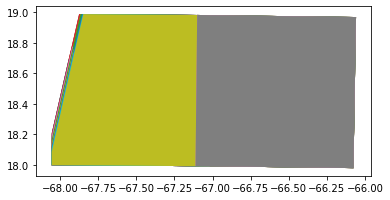

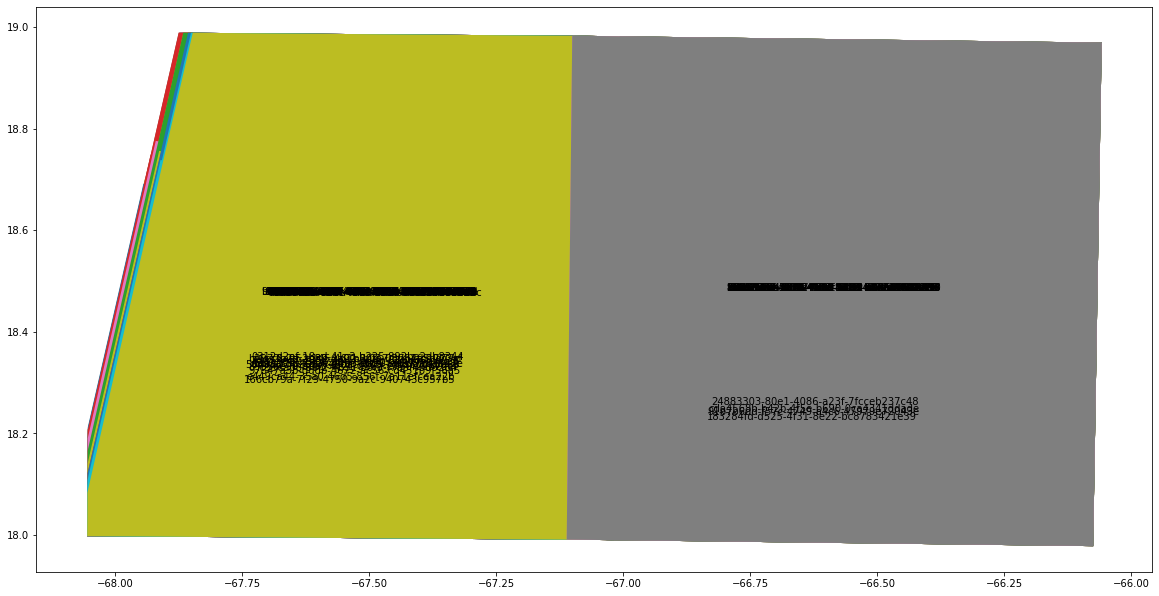

In [9]:
#These are some anciliary code to visually display the products.
areas = api.to_geodataframe(twentyseventeen_products)
areas.plot(column='uuid', cmap=None)
ax = areas.plot(column = 'uuid', cmap = None, figsize = (20,20))
areas.apply(lambda x: ax.annotate(s=x.uuid, xy = x.geometry.centroid.coords[0], ha = 'center'), axis =1)

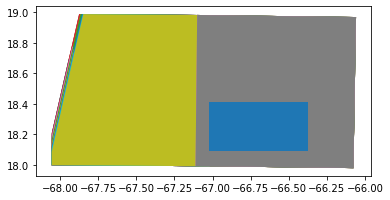

In [10]:
#We could see that the blue square is where the area of interest is and the grey square shows the satellite area coverage of that area.
gdf = gpd.read_file(boundsdata)
f, ax = plt.subplots(1)
areas.plot(ax=ax, column = 'uuid', cmap = None,)
gdf.plot(ax=ax)
plt.show()
areas_sorted = areas.sort_values(['cloudcoverpercentage', 'ingestiondate'], ascending=[True, True])
areas_sorted = areas_sorted.head(20)
